# **problem statment**

Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.

# **Importing Libraries**

In [43]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import sklearn.cluster as cluster
from sklearn import metrics

In [44]:
import warnings
warnings.filterwarnings('ignore')

# **Importing Dataset**

In [45]:
df=pd.read_csv('EastWestAirlines.csv')

In [46]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


# **Performing EDA**

In [47]:
df.drop(['ID#'],axis=1, inplace=True)

In [48]:
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [50]:
df.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

**By seeing this we will get to know that there are not having any null values in the datset.**

In [51]:
df.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


<Axes: >

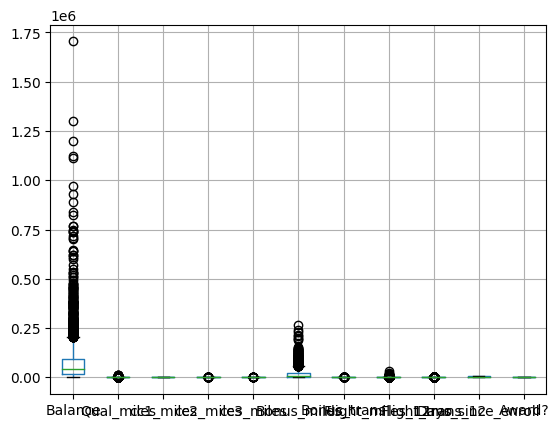

In [52]:
df.boxplot()

# **Standarize the data**

In [53]:
scalar=MinMaxScaler()
scaled_df=scalar.fit_transform(df)

In [54]:
print(scaled_df)

[[0.01650773 0.         0.         ... 0.         0.84374246 0.        ]
 [0.01128788 0.         0.         ... 0.         0.83988425 0.        ]
 [0.02425685 0.         0.         ... 0.         0.84784181 0.        ]
 ...
 [0.0431695  0.         0.5        ... 0.         0.16879672 1.        ]
 [0.03220189 0.         0.         ... 0.01886792 0.16867615 0.        ]
 [0.00176908 0.         0.         ... 0.         0.16831444 0.        ]]


In [55]:
scaled_df1=pd.DataFrame(scaled_df,columns=df.columns)
scaled_df1.head()  

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


# **Hierarchical Clustering**

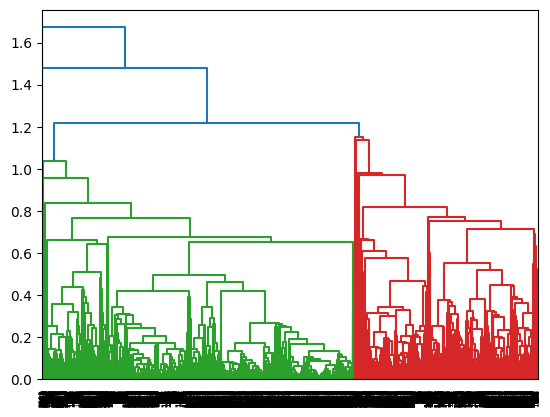

In [56]:
dendrogram = sch.dendrogram(sch.linkage(scaled_df1, method='average'))

The x-axis contains the samples and y-axis represents the distance between these samples. The vertical line with maximum distance is the blue line. If we decide a threshold of 15 and cut the dendrogram

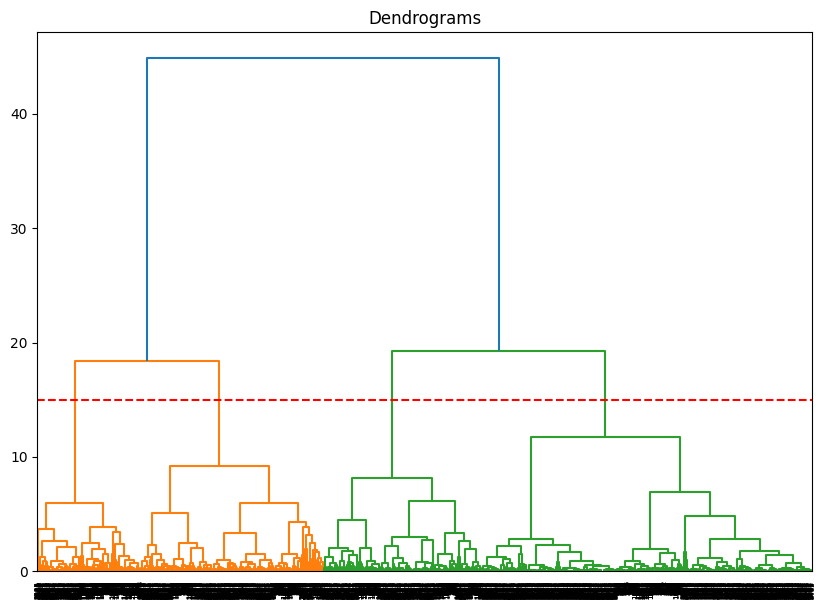

In [57]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = sch.dendrogram(sch.linkage(scaled_df1, method='ward'))
plt.axhline(y=15, color='r', linestyle='--')
plt.show()

In [58]:
# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'single')

In [59]:
y_hc = hc.fit_predict(df)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [60]:
Clusters.value_counts()

Clusters
0           3994
1              3
2              1
3              1
dtype: int64

In [61]:
df['hc_clust']= Clusters
df.iloc[:,1:7].groupby(df.hc_clust).mean()

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans
hc_clust,,,,,,
0,142.382073,2.058338,1.014522,1.012268,17117.363545,11.585628
1,1644.666667,3.000000,1.000000,1.000000,29243.000000,19.666667
2,2706.000000,5.000000,1.000000,1.000000,90653.000000,32.000000
3,0.000000,1.000000,1.000000,1.000000,17108.000000,32.000000


Text(0.5, 0.98, 'Relative comparison of customers in respective clusters')

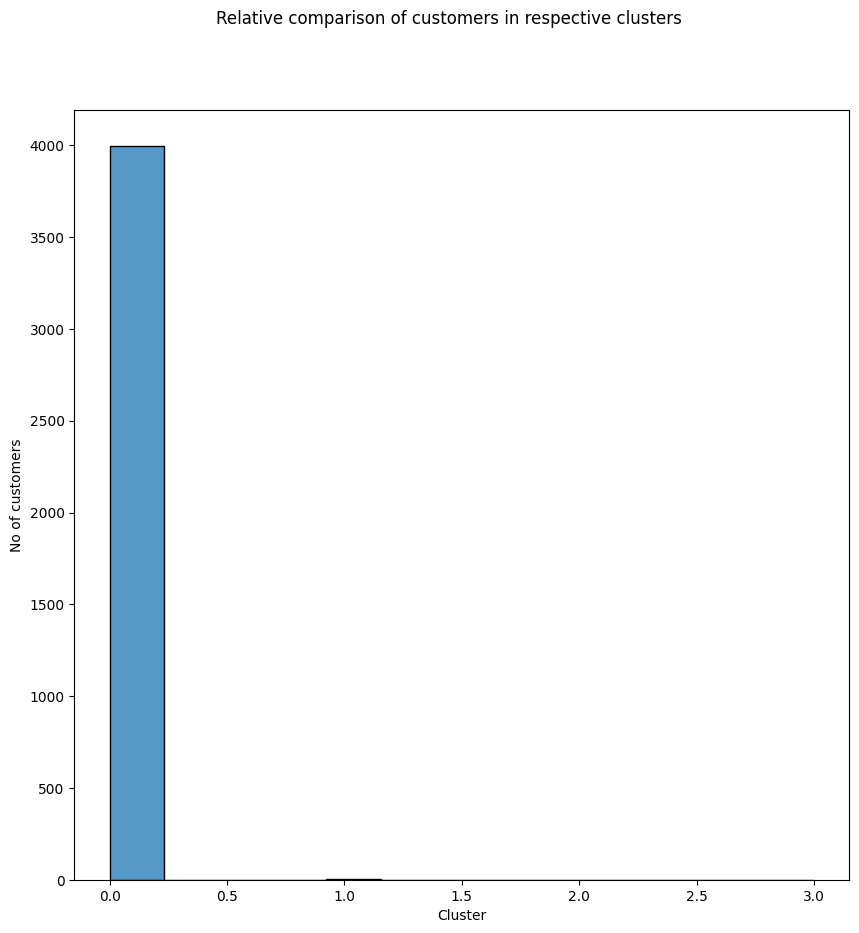

In [62]:
plt.figure(figsize=(10,10))
sns.histplot (x='hc_clust', data=df)
plt.xlabel('Cluster')
plt.ylabel('No of customers')
plt.suptitle('Relative comparison of customers in respective clusters')

# **Kmeans Clustering**

**now lets use the elbow method to decide the optimum number of clusters.**

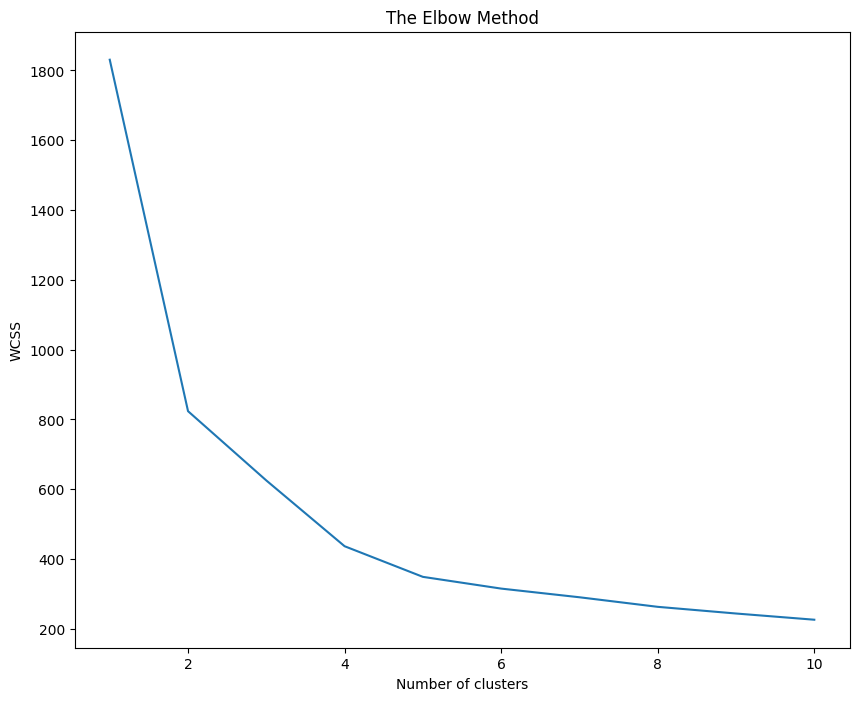

In [63]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 200)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(10, 8)) 
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**As per the above plot,we willl get to know that the optimum number of clusters are 4.**

**To conform about the same lets use silhouette score method.**

In [64]:
for i in range(3,13):
    labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=200).fit(scaled_df).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(scaled_df1,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 3 is 0.45748332355557725
Silhouette score for k(clusters) = 4 is 0.46521656243534165
Silhouette score for k(clusters) = 5 is 0.4331034289974864
Silhouette score for k(clusters) = 6 is 0.38797950408463444
Silhouette score for k(clusters) = 7 is 0.38215573404485803
Silhouette score for k(clusters) = 8 is 0.37942691016839863
Silhouette score for k(clusters) = 9 is 0.3830913983914707
Silhouette score for k(clusters) = 10 is 0.3394967467810053
Silhouette score for k(clusters) = 11 is 0.34182040304206956
Silhouette score for k(clusters) = 12 is 0.34770755011454824


**As per the silhouette score also ,the optimum number of clusters are 4.**

In [65]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
k_means = kmeans.fit_predict(scaled_df1)

In [66]:
k_means

array([0, 0, 0, ..., 1, 0, 0], dtype=int32)

In [67]:
k_means1=k_means
k_cluster = list(k_means1)

In [68]:
df['k_cluster'] = k_cluster

In [69]:
kmeans_mean_cluster = pd.DataFrame(round(df.groupby('k_cluster').mean(),1))

In [70]:
kmeans_mean_cluster

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,hc_clust
k_cluster,,,,,,,,,,,,
0,40747.6,92.3,1.1,1.0,1.0,3335.2,6.5,226.6,0.7,3619.1,0.0,0.0
1,108317.4,198.3,3.9,1.0,1.0,45609.7,20.2,713.7,2.1,4863.4,1.0,0.0
2,83529.2,290.5,1.2,1.0,1.0,8850.4,10.5,1030.1,3.1,4338.9,1.0,0.0
3,118032.1,73.1,3.6,1.0,1.0,31282.7,17.3,225.4,0.6,4436.3,0.0,0.0


In [71]:
pd.DataFrame(round(df.groupby('k_cluster').count(),1))

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,hc_clust
k_cluster,,,,,,,,,,,,
0,1897,1897,1897,1897,1897,1897,1897,1897,1897,1897,1897,1897
1,808,808,808,808,808,808,808,808,808,808,808,808
2,673,673,673,673,673,673,673,673,673,673,673,673
3,621,621,621,621,621,621,621,621,621,621,621,621


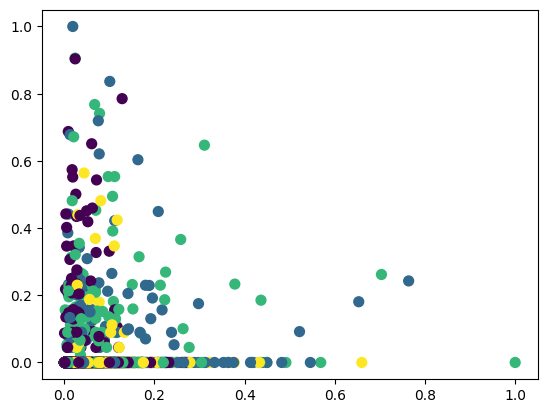

In [72]:
plt.scatter(scaled_df[:, 0], scaled_df[:, 1], c=k_means, s=50, cmap='viridis')

# **DBSCAN Clustering**

In [73]:
dbscan = DBSCAN(eps=2.5, min_samples=21)
dbscan.fit(scaled_df)

DBSCAN(eps=2.5, min_samples=21)

In [74]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0])

**-1 are the noise points in our dataset and the rest are the clusters**

In [78]:
df['DBSCAN_labels'] = dbscan.labels_
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,hc_clust,k_cluster,DBSCAN_labels
0,28143,0,1,1,1,174,1,0,0,7000,0,0,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0,2,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0,2,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,0,0,0
